In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
# Modeling 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor 
from sklearn.svm import SVR 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor 
import warnings 

In [3]:
df = pd.read_csv('data/raw.csv')

In [4]:
df.head() 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math_score'],axis=1)

In [6]:
X.head() 

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
print("Categories in 'gender' variable: ",end=" ")
print(df['gender'].unique())

print(f"Categories in 'race_ethnicity' variable: {df['race_ethnicity'].unique()}")

print(f"Categories in 'parental level of education' variable: {df['parental_level_of_education'].unique()}")

print(f"Categories in 'lunch' variable: {df['lunch'].unique()}")
print(f"Categories in 'test preparation course' variable: {df['test_preparation_course'].unique()}")

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test preparation course' variable: ['none' 'completed']


In [8]:
y=df['math_score']

In [13]:
# Cateogrical to Numerical Features 
# Create column transformer with 3 types of transformers 

num_features = X.select_dtypes(exclude="object").columns 
cat_features = X.select_dtypes(include="object").columns 

from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 

numeric_transformer = StandardScaler() 
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features),
])

In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X.shape

(1000, 19)

In [16]:
# separate dataset into train and test 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

##### Create an Evaluate function to give all metrics after model training 

In [23]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted) 
    rmse = np.sqrt(mse)
    r2 = r2_score(true,predicted) 
    return mae,rmse,r2

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(), 
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = [] 
r2_list = [] 

for i in range(len(list(models))): 
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model 

    # Make predictions 
    y_train_pred = model.predict(X_train) 
    y_test_pred = model.predict(X_test) 

    # Evaluate train and test dataset 
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred) 
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test,y_test_pred) 

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('--------------------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
--------------------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7077
- Mean Absolute Error: 4.5167
- R2 Score: 

In [26]:
# Results 
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2 Score']).sort_values(by=['R2 Score'],ascending=False)

,Model Name,R2 Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.850204
8,AdaBoost Regressor,0.845534
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.751087


#### Linear Regression 

In [27]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train) 
y_pred = lin_model.predict(X_test) 
score = r2_score(y_test,y_pred)*100 
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


#### Plot y_pred and y_test 

Text(0, 0.5, 'Predicted')

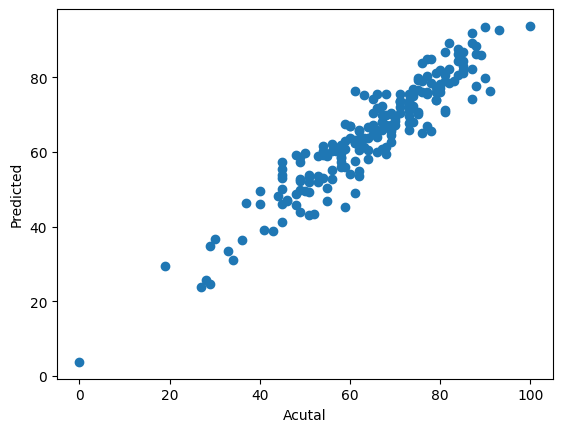

In [28]:
plt.scatter(y_test,y_pred) 
plt.xlabel('Acutal')
plt.ylabel('Predicted')

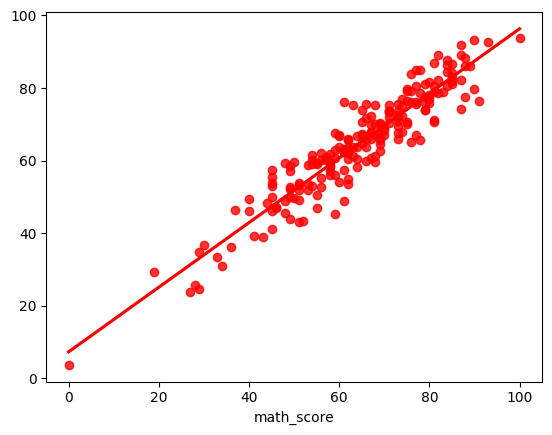

In [29]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red');

#### Difference between actual and predicted values 

In [30]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value': y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
